In [6]:
import sys
sys.path.append("..")

from conf import *
import json
import pandas as pd
from PIL import Image, ImageOps

In [25]:
IMAGES_PATH = BLOG_BASE_DIR / "images/cyberpunk-2077-a-cautionary-tale"


def create_letterbox_thumbnail(image, size):
    # Create a thumbnail while maintaining aspect ratio
    image.thumbnail(size, Image.LANCZOS)
    
    # Add padding to create the letterbox effect
    letterbox_image = ImageOps.pad(image, size, color=(0, 0, 0))  # Black padding
    
    return letterbox_image


def resize_image(image, size):
    """
    Resize an image with a letterbox effect to maintain aspect ratio.

    :param image_path: Path to the input image.
    :param size: Tuple (width, height) for the output image size.
    :param output_path: Path to save the output image.
    """
    # Resize the image while maintaining aspect ratio
    image = ImageOps.fit(image, size, method=Image.Resampling.LANCZOS, centering=(0.5, 0.5))

    # Create a new image with the desired size and black background
    letterbox = Image.new("RGB", size, (0, 0, 0))
    letterbox.paste(image, (0, 0))

    return letterbox
    




In [26]:
images_meta = []
letterbox_size = (1024, 1024)
for image in IMAGES_PATH.glob("*.png"):
    img = Image.open(image)
    
    letterbox_img = None
    resized_img = None
    if img.size != letterbox_size:
        letterbox_img = create_letterbox_thumbnail(img, letterbox_size)
        resized_img = resize_image(img, letterbox_size)

    images_meta.append({
        "img": img,
        "path": str(image),
        "size": img.size,
        "letterbox": letterbox_img,
        "resized": resized_img
    })


df = pd.DataFrame(images_meta)

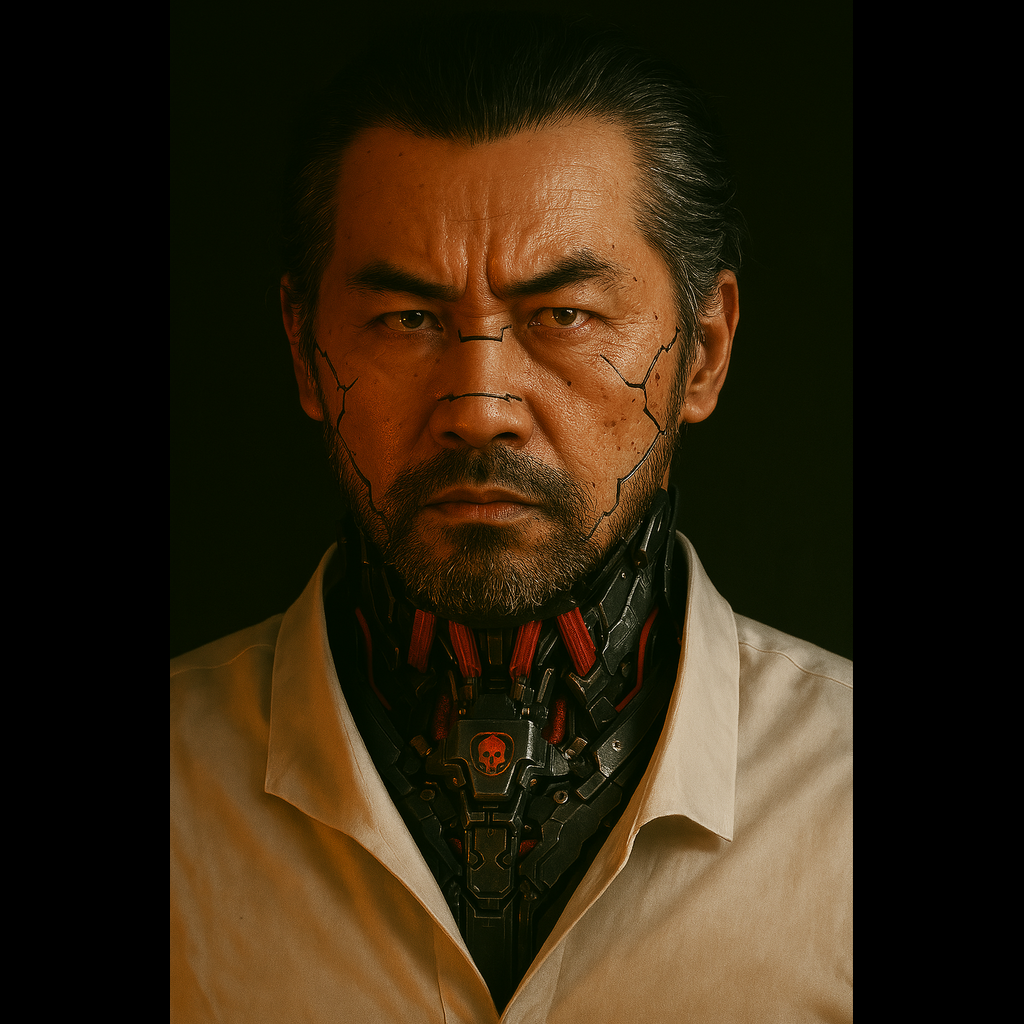

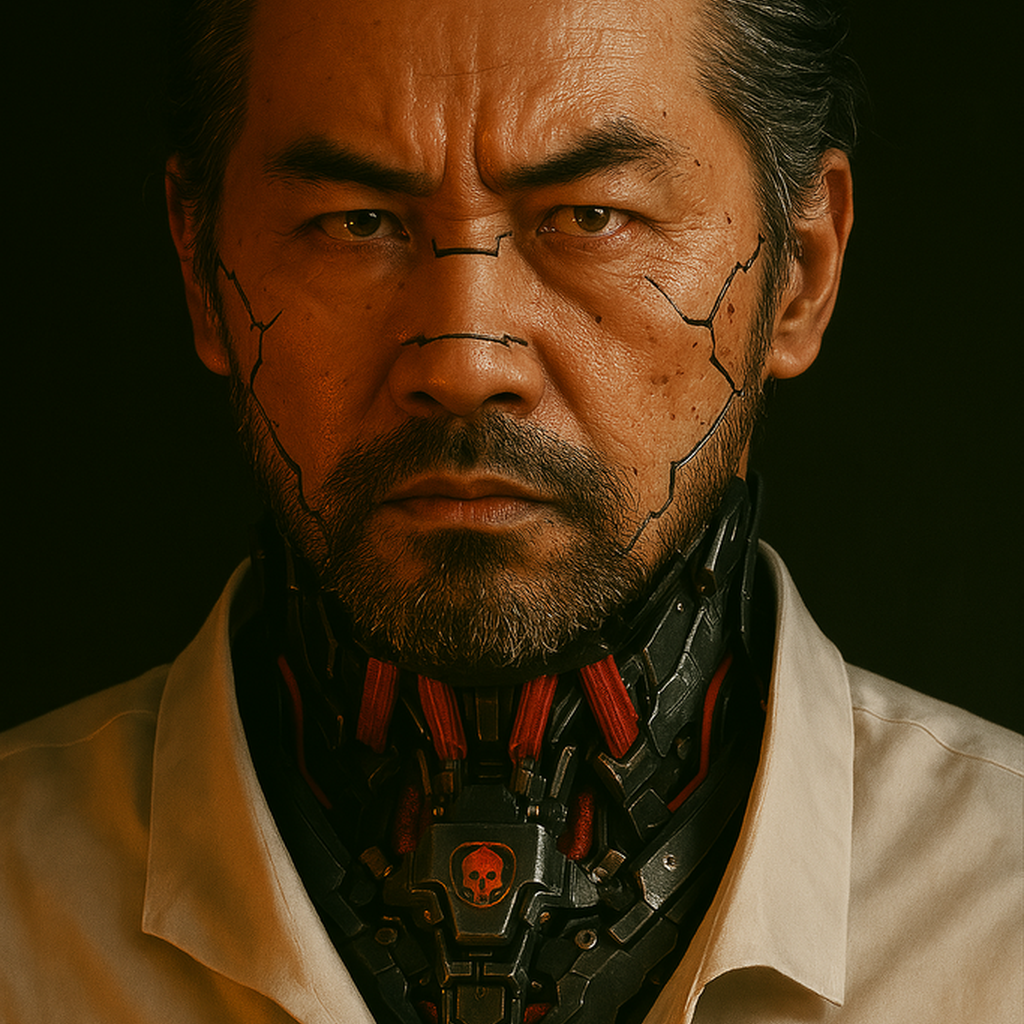

In [48]:
tdf = df[df['letterbox'].notna()]

index = 1
display(tdf['letterbox'].iloc[index])
display(tdf['resized'].iloc[index])